In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
from google.colab import files
uploaded = files.upload()

Saving swiggy.csv.zip to swiggy.csv.zip


In [9]:
import zipfile
import os

# Step 1: ZIP ko unzip karo
with zipfile.ZipFile("/content/swiggy.csv.zip", "r") as zip_ref:
    zip_ref.extractall("/content/swiggy_data")

# Step 2: Extracted files dekho
os.listdir("/content/swiggy_data")


['__MACOSX', 'swiggy.csv']

In [10]:
df = pd.read_csv("/content/swiggy_data/swiggy.csv")
df.head()



,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,200.0,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200.0,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100.0,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250.0,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,250.0,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


Data Cleaning

Remove duplicate rows

In [19]:
df.drop_duplicates(inplace=True)

Handle missing values

In [31]:
df['rating'] = df['rating'].fillna(df['rating'].mean())
df['rating_count'] = df['rating_count'].fillna(0)
df['cost'] = df['cost'].fillna(df['cost'].median())



Remove useless columns (if any)

In [21]:
drop_cols = ['lic_no', 'link', 'menu', 'address']
df.drop(columns=[c for c in drop_cols if c in df.columns], inplace=True)

print("\nAfter cleaning, shape:", df.shape)


After cleaning, shape: (148541, 7)


Basic Insights

In [22]:
print("\nAverage Rating:", round(df['rating'].mean(), 2))
print("Average Cost for Two:", round(df['cost'].mean(), 2))
print("Total Unique Restaurants:", df['name'].nunique())
print("Cities Covered:", df['city'].nunique())


Average Rating: 3.89
Average Cost for Two: 287.57
Total Unique Restaurants: 112818
Cities Covered: 821


Visual Analysis

Top 10 Most Rated Restaurants

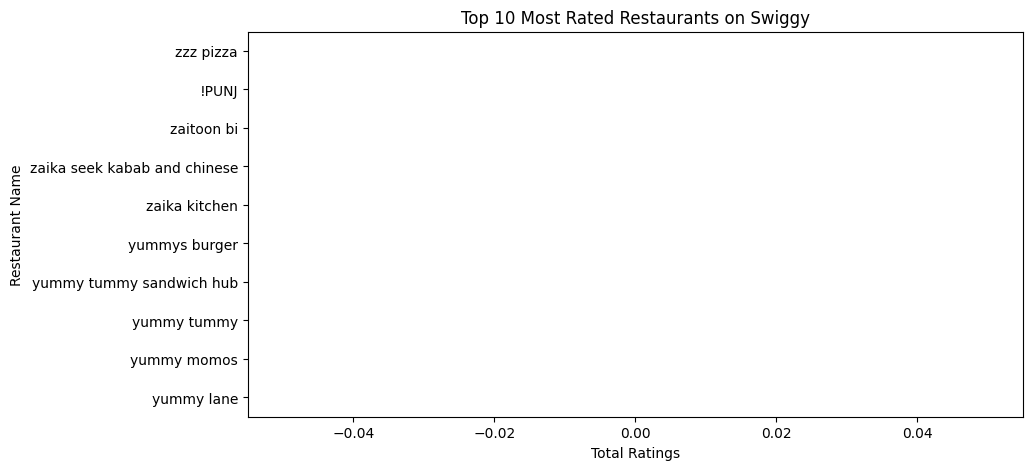

In [24]:
top_restaurants = (
    df.groupby('name')['rating_count']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
plt.figure(figsize=(10,5))
sns.barplot(x=top_restaurants.values, y=top_restaurants.index)
plt.title("Top 10 Most Rated Restaurants on Swiggy")
plt.xlabel("Total Ratings")
plt.ylabel("Restaurant Name")
plt.show()

Average Rating by City

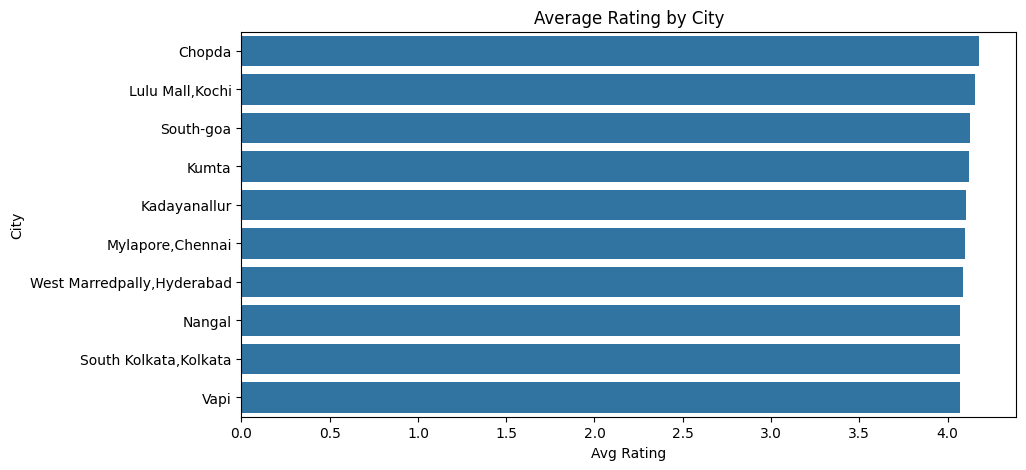

In [25]:
plt.figure(figsize=(10,5))
city_rating = df.groupby('city')['rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=city_rating.values, y=city_rating.index)
plt.title("Average Rating by City")
plt.xlabel("Avg Rating")
plt.ylabel("City")
plt.show()

Cuisine Popularity

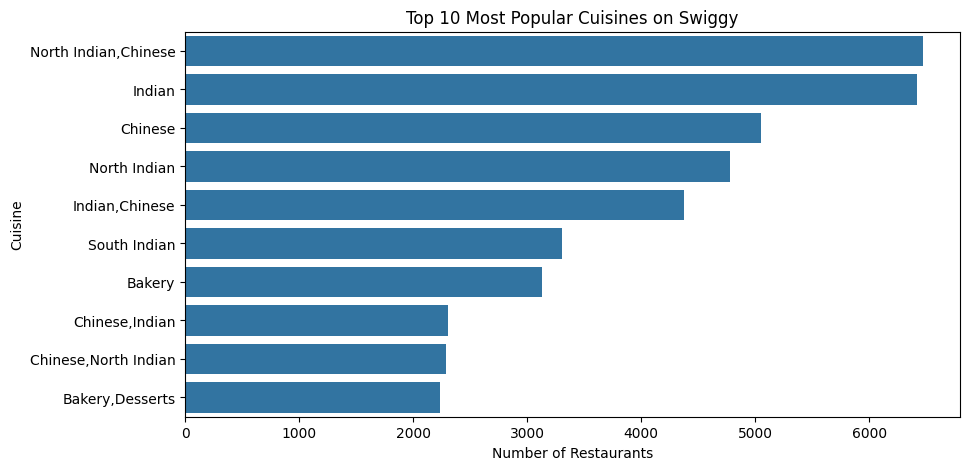

In [26]:
plt.figure(figsize=(10,5))
top_cuisine = df['cuisine'].value_counts().head(10)
sns.barplot(x=top_cuisine.values, y=top_cuisine.index)
plt.title("Top 10 Most Popular Cuisines on Swiggy")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.show()

Cost Distribution

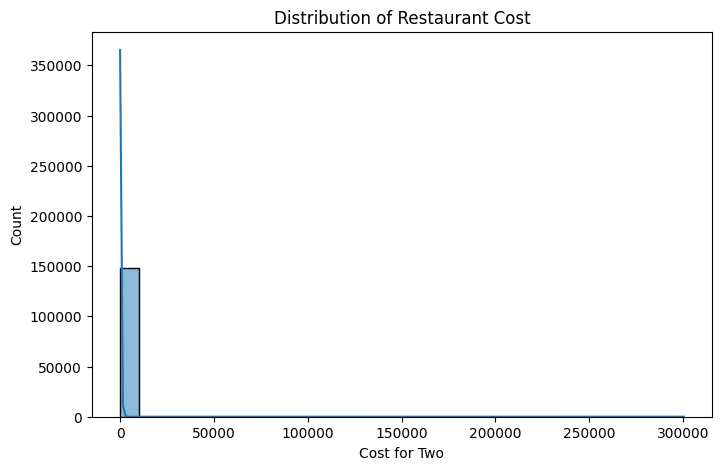

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(df['cost'], bins=30, kde=True)
plt.title("Distribution of Restaurant Cost")
plt.xlabel("Cost for Two")
plt.ylabel("Count")
plt.show()

Rating Distribution

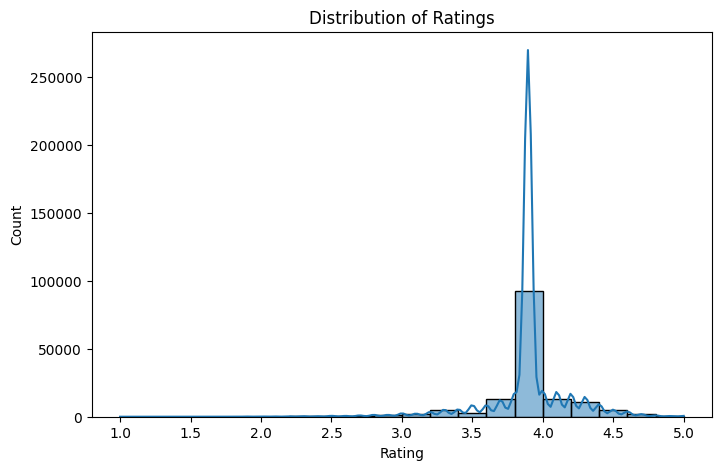

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()



Key Insights Summary

In [29]:
print("\n📊 Key Insights:")
print("- Customers prefer cuisines like", top_cuisine.index[0], "and", top_cuisine.index[1])
print("- The highest-rated city on average is:", city_rating.index[0])
print("- Most rated restaurant overall:", top_restaurants.index[0])
print("- Average cost for two:", round(df['cost'].mean(), 2))




📊 Key Insights:
- Customers prefer cuisines like North Indian,Chinese and Indian
- The highest-rated city on average is: Chopda
- Most rated restaurant overall: zzz pizza
- Average cost for two: 287.57
